<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/IT06/Modelo_entrenamiento__IT06_try01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import PIL
# import tensorflow as tf
 
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from time import time
# import pathlib
 
# path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
# pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)
 
# from google.colab import drive
# drive.mount('/content/drive')

# # batch_size = 32
# batch_size = 32
# img_height = 180
# img_width = 180
 
# #-------------------------------------------------------------------------------
# class TimingCallback(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.times = []
#     def on_epoch_begin(self, batch, logs={}):
#         self.epoch_time_start = time()
#     def on_epoch_end(self, batch, logs={}):
#         self.times.append(time() - self.epoch_time_start)
# #-------------------------------------------------------------------------------
# path_img_leucocitos = "/content/drive/MyDrive/ML_test/DT002/train";
# train_ds = tf.data.experimental.load(path_img_leucocitos)

# path_img_leucocitos = "/content/drive/MyDrive/ML_test/DT002/val";
# val_ds = tf.data.experimental.load(path_img_leucocitos)

# # AUTOTUNE = tf.data.AUTOTUNE
# # train_ds=train_ds.prefetch(buffer_size=AUTOTUNE)
# # val_ds=val_ds.prefetch(buffer_size=AUTOTUNE)
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib
 
path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)
 
from google.colab import drive
drive.mount('/content/drive')
 
# batch_size = 32
batch_size = 32
img_height = 180
img_width = 180
 
#-------------------------------------------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------
 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
 
AUTOTUNE = tf.data.AUTOTUNE
 
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Mounted at /content/drive
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelo DS002-I06-D001

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D001 = TimingCallback()
num_classes = 10

model_I06_D001 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)

])
model_I06_D001.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D001.summary()

epochs=30
history_I06_D001 = model_I06_D001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D001]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 5485s 4s/step - loss: 6.3583 - accuracy: 0.6328 - val_loss: 2.0327 - val_accuracy: 0.7771
Epoch 2/30
1497/1497 [==============================] - 178s 118ms/step - loss: 1.6156 - accuracy: 0.8049 - val_loss: 1.4529 - val_accuracy: 0.8161
Epoch 3/30
1497/1497 [==============================] - 178s 119ms/step - loss: 1.1292 - accuracy: 0.8517 - val_loss: 0.8945 - val_accuracy: 0.8776
Epoch 4/30
1497/1497 [==============================] - 182s 121ms/step - loss: 0.8826 - accuracy: 0.8683 - val_loss: 0.8262 - val_accuracy: 0.8665
Epoch 5/30
1497/1497 [==============================] - 182s 121ms/step - loss: 0.7866 - accuracy: 0.8736 - val_loss: 0.7647 - val_accuracy: 0.8758
Epoch 6/30
1497/1497 [==============================] - 181s 120ms/step - loss: 0.7440 - accuracy: 0.8755 - val_loss: 0.6774 - val_accuracy: 0.9065
Epoch 7/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.7099 - accuracy: 0.8790 - val_lo

[5484.602637290955, 177.99487781524658, 178.03433322906494, 181.88691210746765, 181.66617274284363, 180.96028399467468, 176.00591230392456, 174.75113368034363, 174.29469442367554, 173.56702089309692, 173.7809238433838, 173.98028993606567, 175.13711166381836, 173.5621726512909, 175.25272035598755, 174.81489658355713, 174.52125906944275, 174.65006589889526, 175.9537115097046, 175.36217641830444, 177.17601919174194, 175.4867742061615, 175.7238986492157, 175.45986437797546, 176.54011225700378, 175.09488940238953, 174.69079422950745, 176.1214897632599, 175.6535677909851, 175.79286766052246]
El entrenamiento se demoro: 10588.519583940506 segundos
El entrenamiento se demoro: 176.47532639900842 minutos
accuracy => 0.9090643525123596
loss => 0.4942981004714966
val_accuracy => 0.9220876693725586
val_loss => 0.46070539951324463


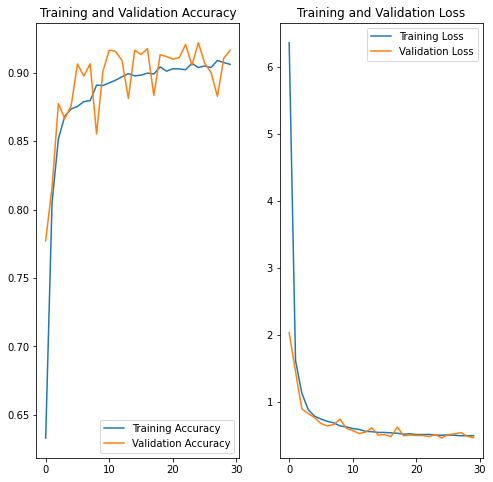

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D001.times)
final_time = 0
for time in cb_I06_D001.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D001.history['accuracy'])))
print('loss => '+ str(min(history_I06_D001.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D001.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D001.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D001.history['accuracy']
val_acc = history_I06_D001.history['val_accuracy']

loss=history_I06_D001.history['loss']
val_loss=history_I06_D001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D002

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D002 = TimingCallback()
num_classes = 10

model_I06_D002 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)

])
model_I06_D002.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D002.summary()

epochs=30
history_I06_D002 = model_I06_D002.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D002]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 177s 117ms/step - loss: 2.7625 - accuracy: 0.6648 - val_loss: 0.7942 - val_accuracy: 0.8217
Epoch 2/30
1497/1497 [==============================] - 175s 116ms/step - loss: 0.7338 - accuracy: 0.8347 - val_loss: 0.6331 - val_accuracy: 0.8699
Epoch 3/30
1497/1497 [==============================] - 174s 116ms/step - loss: 0.6085 - accuracy: 0.8737 - val_loss: 0.5847 - val_accuracy: 0.8856
Epoch 4/30
1497/1497 [==============================] - 175s 117ms/step - loss: 0.5434 - accuracy: 0.8883 - val_loss: 0.6406 - val_accuracy: 0.8481
Epoch 5/30
1497/1497 [==============================] - 175s 117ms/step - loss: 0.5175 - accuracy: 0.8963 - val_loss: 0.5353 - val_accuracy: 0.8925
Epoch 6/30
1497/1497 [==============================] - 175s 117ms/step - loss: 0.4898 - accuracy: 0.9086 - val_loss: 0.4506 - val_accuracy: 0.9231
Epoch 7/30
1497/1497 [==============================] - 175s 117ms/step - loss: 0.4748 - accuracy: 0.9121 - val_

[177.14656472206116, 174.65070176124573, 174.0543134212494, 175.45061707496643, 175.19400691986084, 175.3068552017212, 175.09455156326294, 174.66465210914612, 175.50995469093323, 174.9683277606964, 175.05282044410706, 176.2326807975769, 175.94244170188904, 177.7926344871521, 179.69450116157532, 180.33051919937134, 181.68854999542236, 181.57545351982117, 181.25024962425232, 180.81841373443604, 180.1529459953308, 179.94365048408508, 178.87645983695984, 179.26426792144775, 180.08207988739014, 179.47386527061462, 180.15742444992065, 179.86055326461792, 177.1542727947235, 178.75076293945312]
El entrenamiento se demoro: 5336.1350927352905 segundos
El entrenamiento se demoro: 88.9355848789215 minutos
accuracy => 0.9458060264587402
loss => 0.3482389450073242
val_accuracy => 0.9518997669219971
val_loss => 0.326889306306839


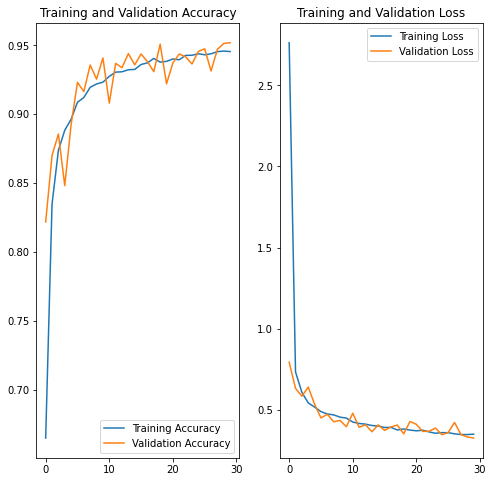

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D002.times)
final_time = 0
for time in cb_I06_D002.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D002.history['accuracy'])))
print('loss => '+ str(min(history_I06_D002.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D002.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D002.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D002.history['accuracy']
val_acc = history_I06_D002.history['val_accuracy']

loss=history_I06_D002.history['loss']
val_loss=history_I06_D002.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D003

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D003 = TimingCallback()
num_classes = 10

model_I06_D003 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.Dense(num_classes)

])
model_I06_D003.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D003.summary()

epochs=30
history_I06_D003 = model_I06_D003.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D003]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 177s 118ms/step - loss: 5.1551 - accuracy: 0.6089 - val_loss: 0.7815 - val_accuracy: 0.7209
Epoch 2/30
1497/1497 [==============================] - 175s 117ms/step - loss: 0.6496 - accuracy: 0.7602 - val_loss: 0.5721 - val_accuracy: 0.7939
Epoch 3/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.5037 - accuracy: 0.8293 - val_loss: 0.4325 - val_accuracy: 0.8627
Epoch 4/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.4089 - accuracy: 0.8729 - val_loss: 0.3987 - val_accuracy: 0.8773
Epoch 5/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.3676 - accuracy: 0.8995 - val_loss: 0.3727 - val_accuracy: 0.9006
Epoch 6/30
1497/1497 [==============================] - 175s 116ms/step - loss: 0.3360 - accuracy: 0.9166 - val_loss: 0.3493 - val_accuracy: 0.9167
Epoch 7/30
1497/1497 [==============================] - 175s 117ms/step - loss: 0.3229 - accuracy: 0.9261 - val_

[177.47469806671143, 175.26147198677063, 175.92107009887695, 176.19340634346008, 175.6574203968048, 174.52268052101135, 175.26954770088196, 176.11004662513733, 174.43142247200012, 175.74846196174622, 175.18403553962708, 175.5649700164795, 175.7250669002533, 175.58120942115784, 175.1546413898468, 175.1132369041443, 175.05995678901672, 175.87185883522034, 175.06122493743896, 176.2305359840393, 176.75417256355286, 177.59139776229858, 177.25022912025452, 177.66098165512085, 176.72519373893738, 175.87239289283752, 175.68307852745056, 176.26079201698303, 176.36575269699097, 177.838947057724]
El entrenamiento se demoro: 5279.139900922775 segundos
El entrenamiento se demoro: 87.98566501537958 minutos
accuracy => 0.9681641459465027
loss => 0.25626489520072937
val_accuracy => 0.9549895524978638
val_loss => 0.30274128913879395


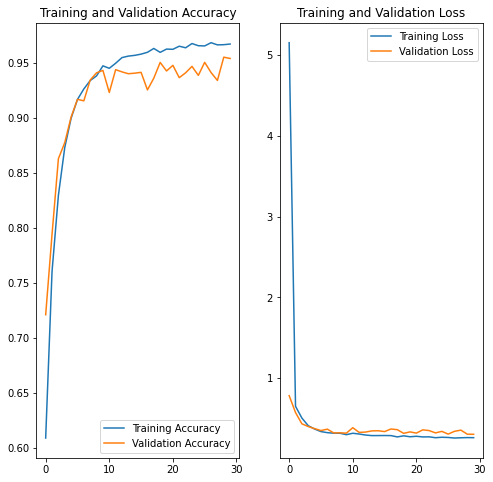

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D003.times)
final_time = 0
for time in cb_I06_D003.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D003.history['accuracy'])))
print('loss => '+ str(min(history_I06_D003.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D003.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D003.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D003.history['accuracy']
val_acc = history_I06_D003.history['val_accuracy']

loss=history_I06_D003.history['loss']
val_loss=history_I06_D003.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D004 = TimingCallback()
num_classes = 10

model_I06_D004 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
  layers.Dense(num_classes)

])
model_I06_D004.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D004.summary()

epochs=30
history_I06_D004 = model_I06_D004.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D004]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 177s 117ms/step - loss: 3.4617 - accuracy: 0.6068 - val_loss: 0.9469 - val_accuracy: 0.7087
Epoch 2/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.6905 - accuracy: 0.7945 - val_loss: 0.7911 - val_accuracy: 0.8047
Epoch 3/30
1497/1497 [==============================] - 176s 117ms/step - loss: 0.5594 - accuracy: 0.8464 - val_loss: 0.5808 - val_accuracy: 0.8332
Epoch 4/30
1497/1497 [==============================] - 177s 118ms/step - loss: 0.4882 - accuracy: 0.8743 - val_loss: 0.5603 - val_accuracy: 0.8490
Epoch 5/30
1497/1497 [==============================] - 178s 118ms/step - loss: 0.4670 - accuracy: 0.8875 - val_loss: 0.4720 - val_accuracy: 0.8899
Epoch 6/30
1497/1497 [==============================] - 175s 117ms/step - loss: 0.4444 - accuracy: 0.9073 - val_loss: 0.4271 - val_accuracy: 0.9199
Epoch 7/30
1497/1497 [==============================] - 173s 115ms/step - loss: 0.5059 - accuracy: 0.8999 - val_

[177.00706577301025, 176.32518672943115, 175.78496432304382, 176.87918519973755, 177.6495122909546, 175.0597801208496, 173.27559280395508, 174.0662055015564, 173.04166293144226, 173.57534646987915, 174.5369095802307, 173.64604473114014, 176.00081753730774, 174.83721709251404, 178.8606777191162, 179.5595805644989, 179.1464328765869, 180.8106813430786, 181.61572766304016, 178.27814769744873, 180.3304786682129, 179.61834859848022, 179.74852919578552, 179.38666582107544, 179.87693524360657, 179.6838641166687, 175.46466994285583, 180.8720371723175, 174.74200987815857, 180.1582682132721]
El entrenamiento se demoro: 5319.838545799255 segundos
El entrenamiento se demoro: 88.66397576332092 minutos
accuracy => 0.9555550813674927
loss => 0.32151076197624207
val_accuracy => 0.952985405921936
val_loss => 0.33079102635383606


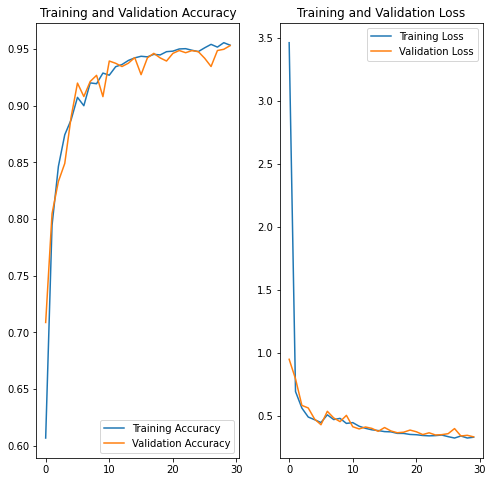

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D004.times)
final_time = 0
for time in cb_I06_D004.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D004.history['accuracy'])))
print('loss => '+ str(min(history_I06_D004.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D004.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D004.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D004.history['accuracy']
val_acc = history_I06_D004.history['val_accuracy']

loss=history_I06_D004.history['loss']
val_loss=history_I06_D004.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D005

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D005 = TimingCallback()
num_classes = 10

model_I06_D005 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.Dense(num_classes)

])
model_I06_D005.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D005.summary()

epochs=30
history_I06_D005 = model_I06_D005.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D005]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 179s 118ms/step - loss: 3.6737 - accuracy: 0.6525 - val_loss: 0.6162 - val_accuracy: 0.7956
Epoch 2/30
1497/1497 [==============================] - 175s 116ms/step - loss: 0.4345 - accuracy: 0.8462 - val_loss: 0.4905 - val_accuracy: 0.8354
Epoch 3/30
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3332 - accuracy: 0.8881 - val_loss: 0.2975 - val_accuracy: 0.9020
Epoch 4/30
1497/1497 [==============================] - 179s 119ms/step - loss: 0.3106 - accuracy: 0.9012 - val_loss: 0.3584 - val_accuracy: 0.8965
Epoch 5/30
1497/1497 [==============================] - 180s 120ms/step - loss: 0.2943 - accuracy: 0.9121 - val_loss: 0.2918 - val_accuracy: 0.9169
Epoch 6/30
1497/1497 [==============================] - 179s 119ms/step - loss: 0.2800 - accuracy: 0.9226 - val_loss: 0.3031 - val_accuracy: 0.9151
Epoch 7/30
1497/1497 [==============================] - 178s 119ms/step - loss: 0.2618 - accuracy: 0.9342 - val_

[178.6333875656128, 174.8125319480896, 180.3254199028015, 179.49678015708923, 179.94859957695007, 179.15527415275574, 178.24133133888245, 178.55654621124268, 177.7713119983673, 173.11486721038818, 173.3823537826538, 173.8123655319214, 173.56344842910767, 172.61458897590637, 173.8030333518982, 174.24341821670532, 173.63251948356628, 177.70384645462036, 176.8764193058014, 176.761394739151, 177.09019303321838, 175.8589267730713, 175.21993708610535, 174.7520728111267, 173.4071912765503, 173.6320526599884, 173.41055941581726, 174.86687445640564, 173.4330382347107, 175.45874857902527]
El entrenamiento se demoro: 5273.579032659531 segundos
El entrenamiento se demoro: 87.89298387765885 minutos
accuracy => 0.973654568195343
loss => 0.21469157934188843
val_accuracy => 0.9548225402832031
val_loss => 0.23521040380001068


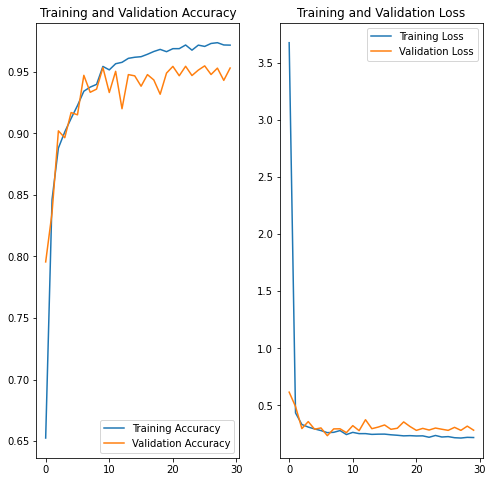

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D005.times)
final_time = 0
for time in cb_I06_D005.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D005.history['accuracy'])))
print('loss => '+ str(min(history_I06_D005.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D005.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D005.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D005.history['accuracy']
val_acc = history_I06_D005.history['val_accuracy']

loss=history_I06_D005.history['loss']
val_loss=history_I06_D005.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D006
El mismo caso anterior , pero reduciendo el numero de ciclos para encontrar un punto obtimo.

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D006 = TimingCallback()
num_classes = 10

model_I06_D006 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
  layers.Dense(num_classes)

])
model_I06_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D006.summary()

epochs=12
history_I06_D006 = model_I06_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/12
1497/1497 [==============================] - 5401s 4s/step - loss: 8.5072 - accuracy: 0.5997 - val_loss: 0.7228 - val_accuracy: 0.7258
Epoch 2/12
1497/1497 [==============================] - 177s 118ms/step - loss: 0.5500 - accuracy: 0.7964 - val_loss: 0.4824 - val_accuracy: 0.8312
Epoch 3/12
1497/1497 [==============================] - 174s 116ms/step - loss: 0.4219 - accuracy: 0.8518 - val_loss: 0.5820 - val_accuracy: 0.7820
Epoch 4/12
1497/1497 [==============================] - 173s 115ms/step - loss: 0.3628 - accuracy: 0.8764 - val_loss: 0.3545 - val_accuracy: 0.8840
Epoch 5/12
1497/1497 [==============================] - 173s 115ms/step - loss: 0.3305 - accuracy: 0.8919 - val_loss: 0.3265 - val_accuracy: 0.9000
Epoch 6/12
1497/1497 [==============================] - 173s 115ms/step - loss: 0.2830 - accuracy: 0.9113 - val_loss: 0.3139 - val_accuracy: 0.9071
Epoch 7/12
1497/1497 [==============================] - 175s 116ms/step - loss: 0.2661 - accuracy: 0.9234 - val_lo

[5401.466485738754, 176.9855499267578, 173.82465028762817, 172.70463252067566, 172.54406595230103, 172.98886251449585, 174.56183123588562, 173.93224501609802, 171.1803605556488, 171.75158667564392, 172.44822311401367, 172.67204809188843]
El entrenamiento se demoro: 7307.060541629791 segundos
El entrenamiento se demoro: 121.78434236049652 minutos
accuracy => 0.95081627368927
loss => 0.23365560173988342
val_accuracy => 0.9435490369796753
val_loss => 0.2659567594528198


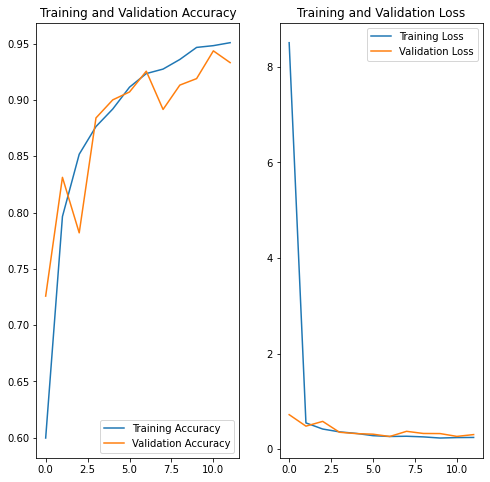

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D006.times)
final_time = 0
for time in cb_I06_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D006.history['accuracy'])))
print('loss => '+ str(min(history_I06_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D006.history['accuracy']
val_acc = history_I06_D006.history['val_accuracy']

loss=history_I06_D006.history['loss']
val_loss=history_I06_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history_I06_D006 = model_I06_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3,
)

Epoch 1/3
1497/1497 [==============================] - 174s 116ms/step - loss: 0.2425 - accuracy: 0.9533 - val_loss: 0.3099 - val_accuracy: 0.9280
Epoch 2/3
1497/1497 [==============================] - 172s 115ms/step - loss: 0.2332 - accuracy: 0.9577 - val_loss: 0.2729 - val_accuracy: 0.9462
Epoch 3/3
1497/1497 [==============================] - 171s 114ms/step - loss: 0.2327 - accuracy: 0.9598 - val_loss: 0.3379 - val_accuracy: 0.9274


## Modelo DS002-I06-D007
Probemos reduciendo mas el nivel de regularizacion.

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D007 = TimingCallback()
num_classes = 10
regularizer = 0.000025

model_I06_D007 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D007.summary()

epochs=20
history_I06_D007 = model_I06_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 175s 116ms/step - loss: 2.5981 - accuracy: 0.7466 - val_loss: 0.4307 - val_accuracy: 0.8551
Epoch 2/20
1497/1497 [==============================] - 171s 114ms/step - loss: 0.4043 - accuracy: 0.8540 - val_loss: 0.3390 - val_accuracy: 0.8854
Epoch 3/20
1497/1497 [==============================] - 170s 113ms/step - loss: 0.3245 - accuracy: 0.8883 - val_loss: 0.2976 - val_accuracy: 0.9071
Epoch 4/20
1497/1497 [==============================] - 171s 114ms/step - loss: 0.2996 - accuracy: 0.9008 - val_loss: 0.2875 - val_accuracy: 0.9056
Epoch 5/20
1497/1497 [==============================] - 167s 111ms/step - loss: 0.2518 - accuracy: 0.9198 - val_loss: 0.3113 - val_accuracy: 0.9033
Epoch 6/20
1497/1497 [==============================] - 168s 112ms/step - loss: 0.2463 - accuracy: 0.9272 - val_loss: 0.3328 - val_accuracy: 0.9009
Epoch 7/20
1497/1497 [==============================] - 166s 110ms/step - loss: 0.2260 - accuracy: 0.9368 - val_

[174.65509414672852, 171.0242829322815, 169.99068903923035, 170.61674666404724, 166.54305005073547, 167.72948575019836, 165.54184222221375, 170.08671474456787, 169.71120166778564, 172.33276867866516, 173.0110981464386, 174.46176838874817, 173.77848148345947, 171.55109095573425, 170.43037581443787, 178.22852993011475, 177.95883774757385, 179.0718936920166, 179.95718812942505, 184.1772210597992]
El entrenamiento se demoro: 3460.8583612442017 segundos
El entrenamiento se demoro: 57.68097268740336 minutos
accuracy => 0.9732996821403503
loss => 0.18263797461986542
val_accuracy => 0.9546555280685425
val_loss => 0.22346220910549164


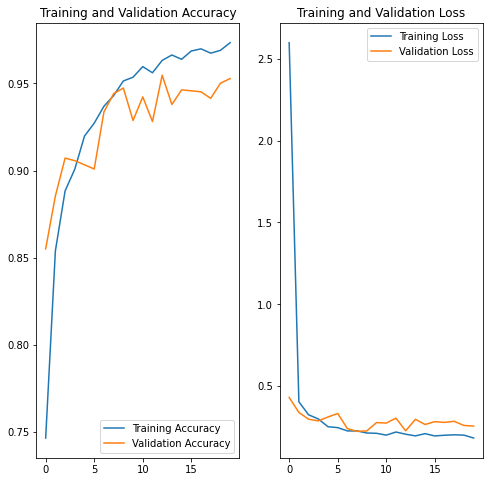

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D007.times)
final_time = 0
for time in cb_I06_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D007.history['accuracy'])))
print('loss => '+ str(min(history_I06_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D007.history['accuracy']
val_acc = history_I06_D007.history['val_accuracy']

loss=history_I06_D007.history['loss']
val_loss=history_I06_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D008
Probemos reduciendo mas el nivel de regularizacion. 0.00004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D008 = TimingCallback()
num_classes = 10
regularizer = 0.00004

model_I06_D008 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D008.summary()

epochs=20
history_I06_D008 = model_I06_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 179s 119ms/step - loss: 2.0490 - accuracy: 0.6457 - val_loss: 0.7243 - val_accuracy: 0.7290
Epoch 2/20
1497/1497 [==============================] - 181s 120ms/step - loss: 0.5172 - accuracy: 0.8049 - val_loss: 0.4570 - val_accuracy: 0.8424
Epoch 3/20
1497/1497 [==============================] - 178s 119ms/step - loss: 0.4938 - accuracy: 0.8228 - val_loss: 0.3788 - val_accuracy: 0.8760
Epoch 4/20
1497/1497 [==============================] - 178s 119ms/step - loss: 0.3418 - accuracy: 0.8895 - val_loss: 0.3138 - val_accuracy: 0.9064
Epoch 5/20
1497/1497 [==============================] - 180s 120ms/step - loss: 0.2974 - accuracy: 0.9107 - val_loss: 0.2798 - val_accuracy: 0.9178
Epoch 6/20
1497/1497 [==============================] - 181s 120ms/step - loss: 0.2831 - accuracy: 0.9200 - val_loss: 0.2595 - val_accuracy: 0.9314
Epoch 7/20
1497/1497 [==============================] - 183s 122ms/step - loss: 0.2640 - accuracy: 0.9315 - val_

[179.35663628578186, 180.68085932731628, 178.3314106464386, 178.05431413650513, 180.45204257965088, 180.78272485733032, 182.50899362564087, 182.10171103477478, 182.35538792610168, 179.84051847457886, 180.4027807712555, 181.65112614631653, 180.0241663455963, 180.1669409275055, 178.90465116500854, 178.7459728717804, 178.5430407524109, 178.11327981948853, 179.86203384399414, 178.7474341392517]
El entrenamiento se demoro: 3599.6260256767273 segundos
El entrenamiento se demoro: 59.993767094612124 minutos
accuracy => 0.9676631689071655
loss => 0.22012858092784882
val_accuracy => 0.9549060463905334
val_loss => 0.25954577326774597


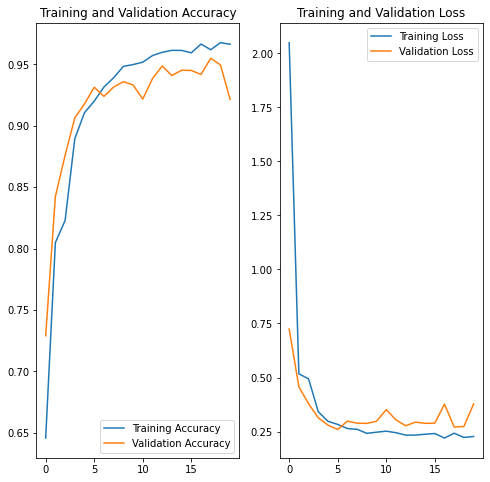

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D008.times)
final_time = 0
for time in cb_I06_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D008.history['accuracy'])))
print('loss => '+ str(min(history_I06_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D008.history['accuracy']
val_acc = history_I06_D008.history['val_accuracy']

loss=history_I06_D008.history['loss']
val_loss=history_I06_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D009
Probemos reduciendo mas el nivel de regularizacion. 0.000035

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D009 = TimingCallback()
num_classes = 10
regularizer = 0.000035

model_I06_D009 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D009.summary()

epochs=20
history_I06_D009 = model_I06_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 178s 118ms/step - loss: 5.2502 - accuracy: 0.6455 - val_loss: 0.6464 - val_accuracy: 0.7410
Epoch 2/20
1497/1497 [==============================] - 178s 118ms/step - loss: 0.5558 - accuracy: 0.7850 - val_loss: 0.5237 - val_accuracy: 0.8000
Epoch 3/20
1497/1497 [==============================] - 179s 119ms/step - loss: 0.4405 - accuracy: 0.8405 - val_loss: 0.4654 - val_accuracy: 0.8448
Epoch 4/20
1497/1497 [==============================] - 181s 121ms/step - loss: 0.3763 - accuracy: 0.8702 - val_loss: 0.3743 - val_accuracy: 0.8737
Epoch 5/20
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3227 - accuracy: 0.8942 - val_loss: 0.3603 - val_accuracy: 0.8885
Epoch 6/20
1497/1497 [==============================] - 180s 120ms/step - loss: 0.2945 - accuracy: 0.9089 - val_loss: 0.2971 - val_accuracy: 0.9140
Epoch 7/20
1497/1497 [==============================] - 178s 118ms/step - loss: 0.3052 - accuracy: 0.9096 - val_

[178.3953993320465, 177.57994747161865, 178.60130381584167, 181.02338910102844, 179.52948880195618, 180.34201192855835, 177.975750207901, 178.3437352180481, 178.0129165649414, 180.10869574546814, 180.8629310131073, 179.26599884033203, 178.92714405059814, 179.19596028327942, 179.05311822891235, 178.25754284858704, 178.60443782806396, 179.16063165664673, 178.79435467720032, 178.5945270061493]
El entrenamiento se demoro: 3580.629284620285 segundos
El entrenamiento se demoro: 59.677154743671416 minutos
accuracy => 0.9669742584228516
loss => 0.20561935007572174
val_accuracy => 0.949561595916748
val_loss => 0.2643706500530243


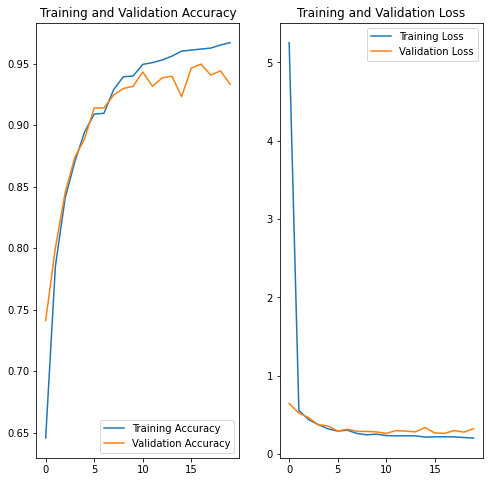

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I06_D009.times)
final_time = 0
for time in cb_I06_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D009.history['accuracy'])))
print('loss => '+ str(min(history_I06_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D009.history['accuracy']
val_acc = history_I06_D009.history['val_accuracy']

loss=history_I06_D009.history['loss']
val_loss=history_I06_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I06-D009 try-2
Probemos reduciendo mas el nivel de regularizacion. 0.000035

In [2]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I06_D009 = TimingCallback()
num_classes = 10
regularizer = 0.000035

model_I06_D009 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(regularizer)),
  layers.Dense(num_classes)

])
model_I06_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I06_D009.summary()

epochs=20
history_I06_D009 = model_I06_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I06_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 9283s 6s/step - loss: 3.1768 - accuracy: 0.6989 - val_loss: 0.5636 - val_accuracy: 0.8050
Epoch 2/20
1497/1497 [==============================] - 126s 84ms/step - loss: 0.4361 - accuracy: 0.8426 - val_loss: 0.3479 - val_accuracy: 0.8825
Epoch 3/20
1497/1497 [==============================] - 125s 84ms/step - loss: 0.3421 - accuracy: 0.8783 - val_loss: 0.3232 - val_accuracy: 0.8858
Epoch 4/20
1497/1497 [==============================] - 125s 83ms/step - loss: 0.2984 - accuracy: 0.8975 - val_loss: 0.2453 - val_accuracy: 0.9188
Epoch 5/20
1497/1497 [==============================] - 124s 83ms/step - loss: 0.2695 - accuracy: 0.9113 - val_loss: 0.2633 - val_accuracy: 0.9177
Epoch 6/20
1497/1497 [==============================] - 124s 83ms/step - loss: 0.4194 - accuracy: 0.8663 - val_loss: 0.4481 - val_accuracy: 0.8643
Epoch 7/20
1497/1497 [==============================] - 125s 83ms/step - loss: 0.3209 - accuracy: 0.9100 - val_loss: 0.

[9283.122329235077, 125.58678197860718, 125.4882071018219, 125.09247088432312, 124.06941866874695, 124.32151222229004, 124.57455134391785, 124.30806350708008, 125.91191673278809, 125.79490423202515, 126.59350824356079, 125.81711316108704, 127.35477066040039, 126.29072833061218, 126.25717830657959, 125.98785853385925, 125.11270642280579, 125.62255358695984, 125.34423995018005, 124.87535810470581]
El entrenamiento se demoro: 11667.526171207428 segundos
El entrenamiento se demoro: 194.4587695201238 minutos
accuracy => 0.9699803590774536
loss => 0.2242957055568695
val_accuracy => 0.9497286081314087
val_loss => 0.2453479915857315


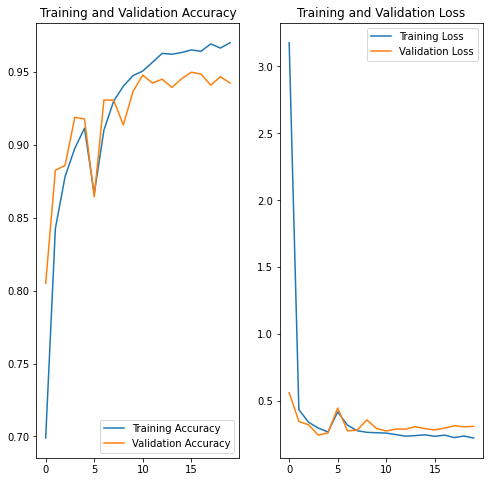

In [3]:
#-------------------------------------------------------------------------------

print(cb_I06_D009.times)
final_time = 0
for time in cb_I06_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I06_D009.history['accuracy'])))
print('loss => '+ str(min(history_I06_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_I06_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I06_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I06_D009.history['accuracy']
val_acc = history_I06_D009.history['val_accuracy']

loss=history_I06_D009.history['loss']
val_loss=history_I06_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()